## Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#df = pd.read_csv("/Users/houleyeanne/Documents/GitHub/WEEK5/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Crosstab Analysis:



* Create a crosstab between the product category and the isBestSeller status.


In [4]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


* Are there categories where being a best-seller is more prevalent?
Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order

In [5]:

proportion_best_sellers = (crosstab_result[True] / crosstab_result.sum(axis=1)).sort_values(ascending=False)

proportion_best_sellers

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Projectors                        0.000000
Printer Accessories               0.000000
Power Supplies                    0.000000
Basketball Footwear               0.000000
Barebone PCs                      0.000000
Length: 296, dtype: float64

### Statistical Tests:



* Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.


In [6]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

* Compute Cramér's V to understand the strength of association between best-seller status and category.

In [7]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

### Visualizations:



* Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

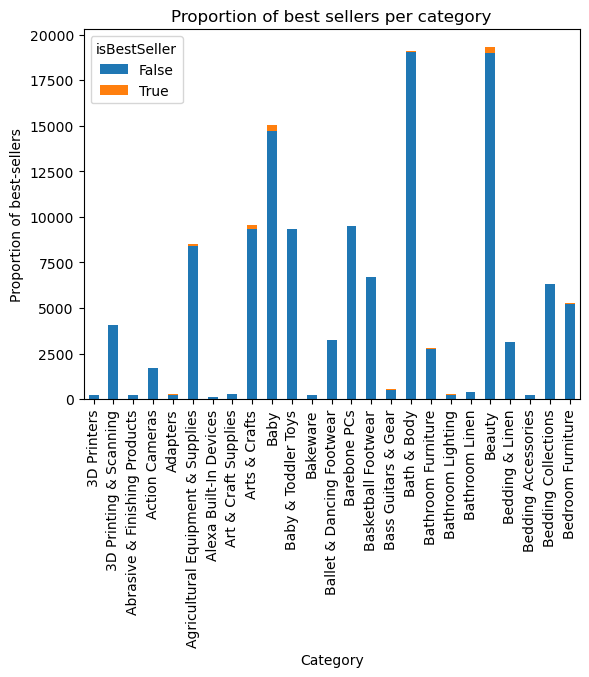

In [8]:
crosstab_result.head(25).plot(kind="bar", stacked=True)
plt.xlabel('Category')
plt.ylabel('Proportion of best-sellers')
plt.title('Proportion of best sellers per category')
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands



Objective: Investigate how different product categories influence product prices.

### Preliminary Step: Remove outliers in product prices.



For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [9]:
df.shape

(2443651, 9)

In [10]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [11]:
data_series = df['price'] 
outliers = tukeys_test_outliers(data_series)
print(outliers)
df = df.iloc[~outliers.index,:] # ~ = NOT

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [12]:
df.shape

(327688, 9)

### Violin Plots:



* Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.


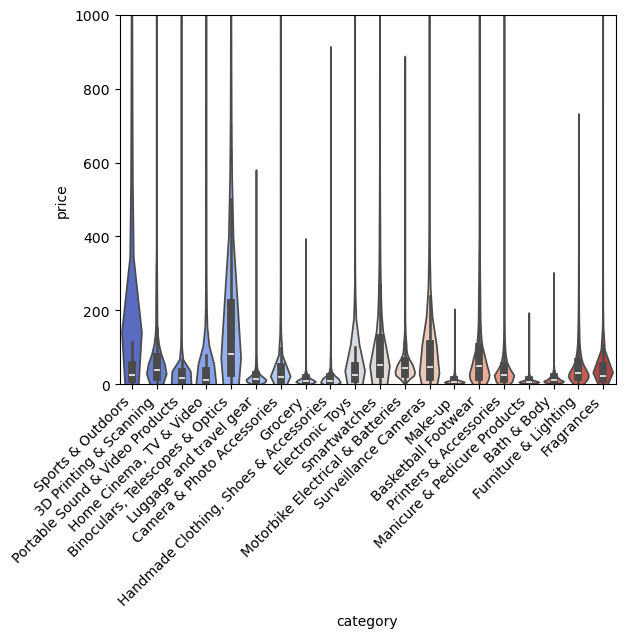

In [59]:
top_20_categories = df['category'].value_counts().nlargest(20).index
filtered_df = df[df['category'].isin(top_20_categories)]


sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm", hue='category', legend=False)
plt.xticks(rotation=45, ha="right")
#plt.ylim(0,1000)
plt.show()


* Which product category tends to have the highest median price? Don't filter here by top categories.


In [95]:
median_prices = df.groupby('category')['price'].median()

highest_median_category_price = median_prices.idxmax()
highest_median_price = median_prices.max()

print(highest_median_category_price, highest_median_price)

Digital Cameras 1524.0


### Bar Charts:



* Create a bar chart comparing the average price of products for the top 10 product categories (based on count).


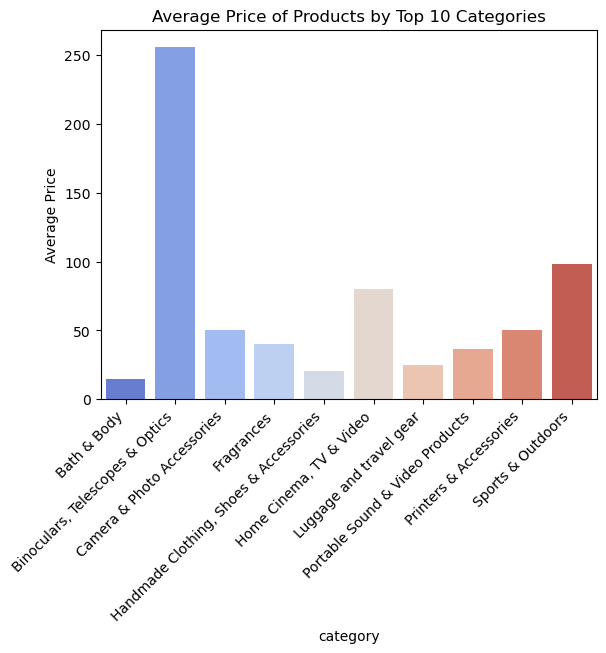

In [77]:

top_10_categories = df['category'].value_counts().nlargest(10).index

filtered_df1 = df[df['category'].isin(top_10_categories)]

average_price = filtered_df1.groupby('category')['price'].mean().reset_index()

sns.barplot(data=average_price, x='category', y='price', hue= 'category', palette="coolwarm", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Price")
plt.title("Average Price of Products by Top 10 Categories")

# Show the plot
plt.show()



* Which product category commands the highest average price? Don't filter here by top categories.

In [96]:
mean_prices = df.groupby('category')['price'].mean()

highest_mean_category = mean_prices.idxmax()
highest_mean_price = mean_prices.max()

print(highest_mean_category, highest_mean_price)

Digital Cameras 1524.0


### Box Plots:



* Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Portable Sound & Video Products'),
  Text(2, 0, 'Home Cinema, TV & Video'),
  Text(3, 0, 'Binoculars, Telescopes & Optics'),
  Text(4, 0, 'Luggage and travel gear'),
  Text(5, 0, 'Camera & Photo Accessories'),
  Text(6, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(7, 0, 'Printers & Accessories'),
  Text(8, 0, 'Bath & Body'),
  Text(9, 0, 'Fragrances')])

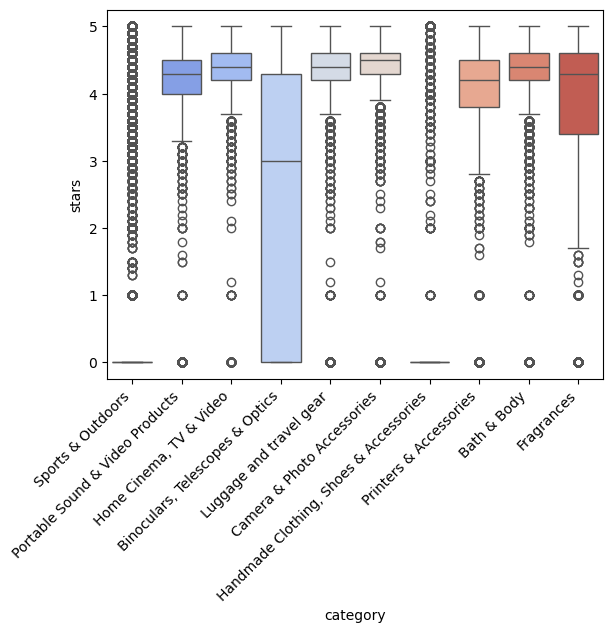

In [87]:
top10 = df['category'].value_counts().nlargest(10).index
filtered_df2 = df[df['category'].isin(top10)]
sns.boxplot(data=filtered_df2, x='category', y='stars', palette="coolwarm", hue='category', legend=False);
plt.xticks(rotation=45, ha="right")


* Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [90]:
median_rating = df.groupby('category')['stars'].median()

highest_median_category_stars = median_rating.idxmax()
highest_median_stars_rating = median_rating.max()


print(highest_median_category_stars, highest_median_stars_rating)

USB Hubs 4.9


In [ ]:
medi_prices = df.groupby('category')['price'].mean()

highest_mean_category = mean_prices.idxmax()
highest_mean_price = mean_prices.max()

print(highest_mean_category, highest_mean_price)

### Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.



### Correlation Coefficients:



* Calculate the correlation coefficient between price and stars.


In [97]:
correlation = df['price'].corr(df['stars'])
correlation

-0.0984252544741658

In [98]:
correlation = correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.10476880404853645

* Is there a significant correlation between product price and its rating?


Both correlation values show a weak negative relationship. This suggests that there is no strong relationship between a product's price and the rating it receives. Price does not seem to be a determining factor in product ratings. Ratings given by users are probably influenced by other factors, such as perceived quality, personal satisfaction, or other product characteristics not directly related to price.

### Visualizations:

* Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?


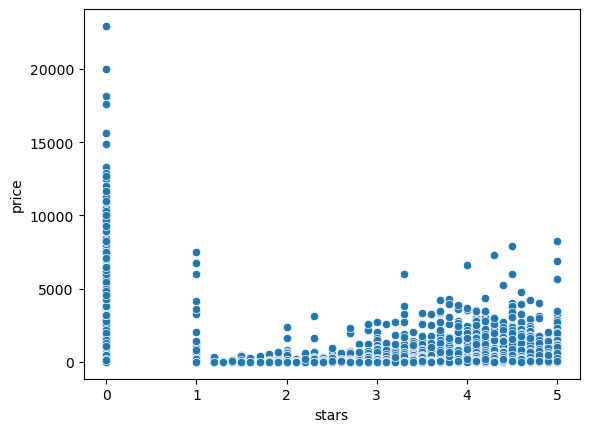

In [99]:
sns.scatterplot(data=df, x='stars', y='price');

The expensive items are more keen to receive bad reviews. 

* Use a correlation heatmap to visualize correlations between all numerical variables.


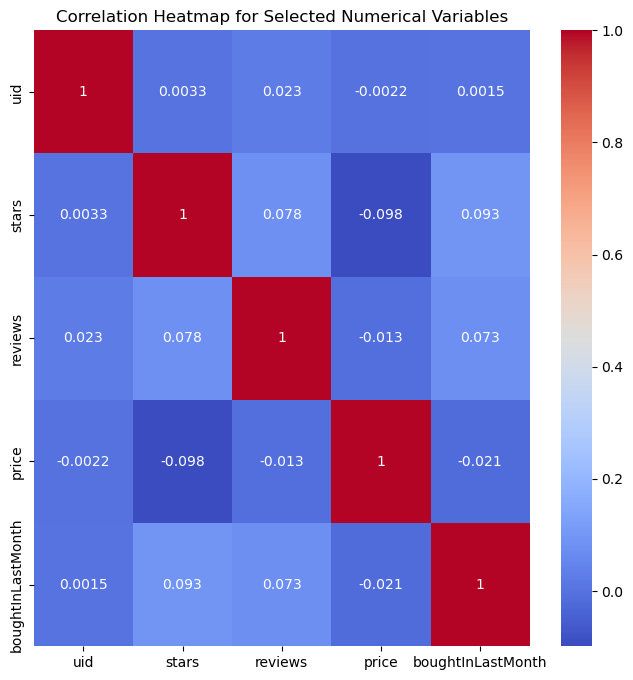

In [119]:
df_numerical = df.select_dtypes(include=['number']).columns
correlation_matrix = df[df_numerical].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

* Examine if product prices typically follow a normal distribution using a QQ plot.

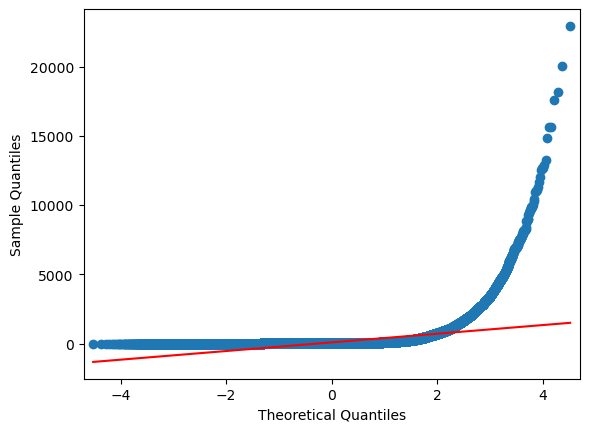

In [120]:
import statsmodels.api as sm

sm.qqplot(df['price'], line='s');